### In this tuorial, a practical usage of KMeans Clustering is discussed. We can use KMeans Clustering for Image Segmentation tasks. In other word, using KMeans Clustering we can identify different segments present in an image. See the example

In [45]:
import cv2
img=cv2.imread('bread.jpg')

loading the bread.jpg int img

In [46]:
(height,width)=img.shape[:2]
print(img.shape)

(687, 1025, 3)


```img.shape``` have 3 dimension since it is a color image. Height,width and 3 colors (687,1025,3).

343 and 512 will be loaded into height and width respectively

In [47]:
img=cv2.resize(img,(int(width/2),int(height/2)))

Image is resied into half from its original size

In [48]:
(height,width)=img.shape[:2]

Taking the new height and width into ```height,width```

In [49]:
flat_array=img.reshape((height*width,3))

Image is is flatten into a 2D array. Originally the dimensions of the image was (height,width,3), now it is reshaped to (height x width,3). In other words we have flatten the image into a 2D array. ```flat_array``` can be considered as a 2D array which has height x width number of rows and 3 columns. Therefore each row represents a pixel in a image and 3 columns represent B,G,R components of each pixel. 

In [50]:
from sklearn.cluster import KMeans
clsfr=KMeans(n_clusters=6)

clsfr.fit(flat_array)
labels=clsfr.labels_

The ```flat_array``` will be categorized into 6 clusters using KMeans clustering which is an Unsupervised Machine Learning Algorithm. Here the ```flat_array``` is considered as an dataset. Which contains pixels as the image as data. There are 3 features in the dataset as R,G,B components of each pixel. Simply, it can be understood that the KMeans Algorithm will categorize all the pixels into 6 clusters.

```labels``` will contain the labels returned for each and every pixel
Note that the labels array will have the shape of (height x width), since labels contains the predicted clusters corresponding   to each and every pixel.

In [51]:
labels_2d=labels.reshape((height,width))

```labels``` array has a shape of (height x width). It is reshaped into (height,width) and stored into ```labels_2d```.
Note that ```labels_2d``` now has the dimensions of the original image.

In [52]:
for i in range(height):
    for j in range(width):
        
        if(labels_2d[i][j]==0):
            img[i][j]=[255,0,0]
        elif(labels_2d[i][j]==1):
            img[i][j]=[0,255,0]
        elif(labels_2d[i][j]==2):
            img[i][j]=[0,0,255]
        elif(labels_2d[i][j]==3):
            img[i][j]=[0,255,255]
        elif(labels_2d[i][j]==4):
            img[i][j]=[255,0,255]
        elif(labels_2d[i][j]==5):
            img[i][j]=[255,255,0]

Using nested loops, labels of each pixel are checked by going throghout the image. And pixels are colored according to the corresponding cluster values. 

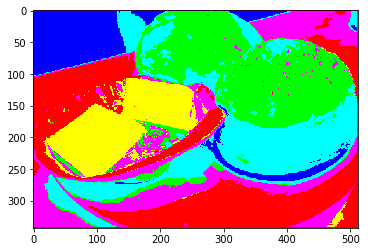

In [54]:
from matplotlib import pyplot as plt

plt.imshow(img)
plt.show()

You can use different values for ```n_clusters``` in ```clsfr=KMeans(n_clusters=6)``` see the different segmentation results, and try to obtain the optimal result.